# Import important libaries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

# Load the dataset.

In [2]:
las=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [3]:
las.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
las.shape

(614, 13)

Dataset contains 614 rows and 13 columns.

Extracting columns.

In [5]:
las.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
las.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Checking for null values.

In [7]:
las.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Statsitical Summary of the data.

In [8]:
las.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Imbalanced dataset.

1st ,2nd and 3rd quartile has major differences in many of the columns.

Plotting heatmap for null values.

<AxesSubplot:>

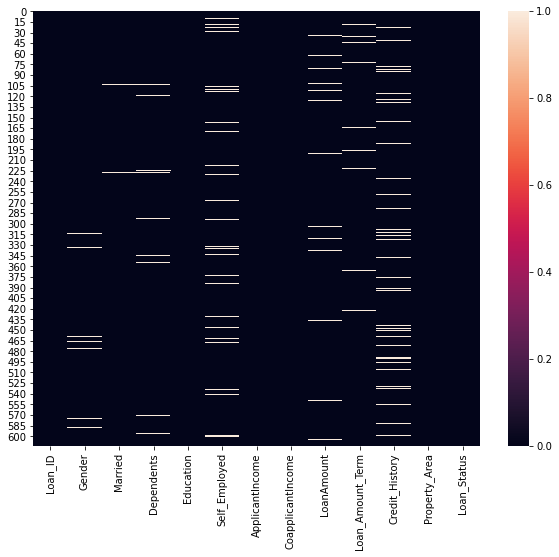

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(las.isnull())

# Correlation Matrix.

In [10]:
las.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


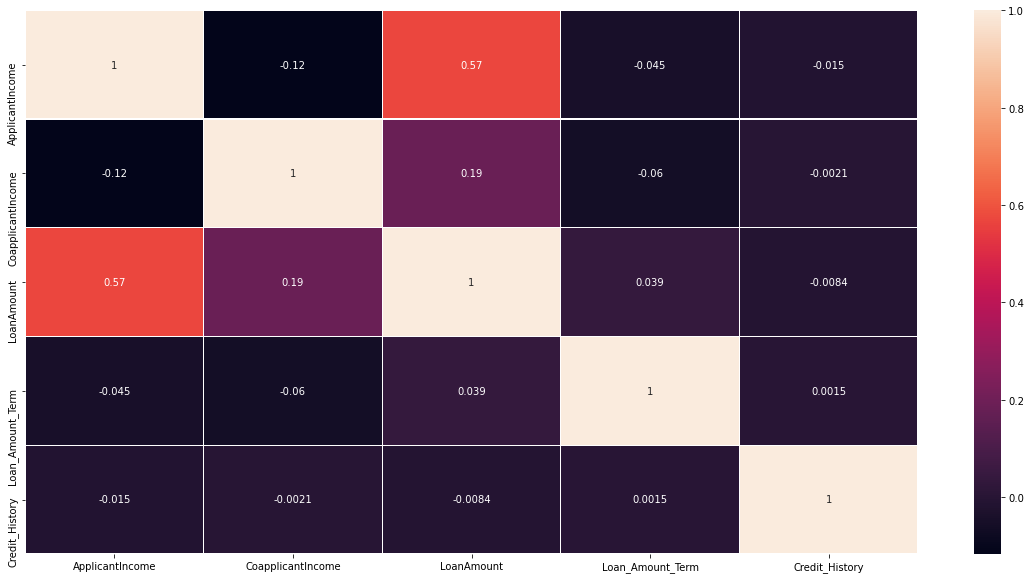

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(las.corr(),annot = True,linecolor='white',linewidth=.2)
plt.show()

# Seggragating categorical columns.

In [12]:
las_1=las.select_dtypes(exclude='object')

# EDA.

<AxesSubplot:xlabel='CoapplicantIncome'>

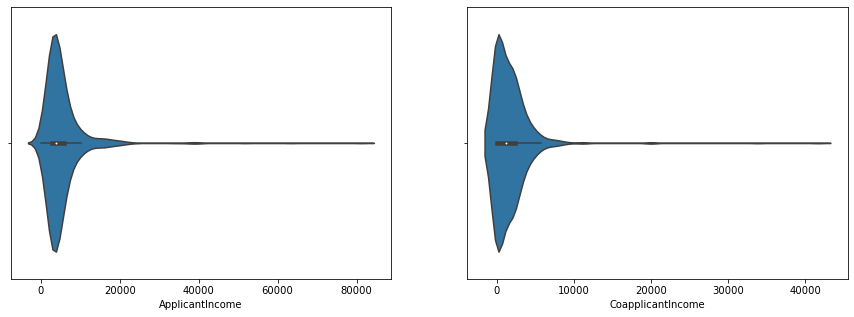

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot('ApplicantIncome',data=las)
plt.subplot(1,2,2)
sns.violinplot('CoapplicantIncome',data=las)

<AxesSubplot:xlabel='Loan_Amount_Term'>

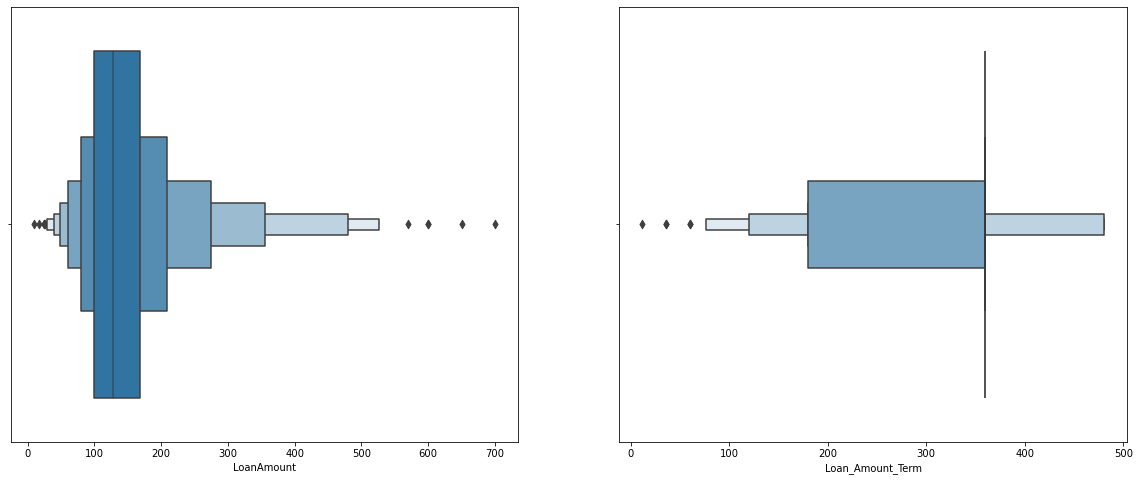

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxenplot('LoanAmount',data=las)

plt.subplot(1,2,2)
sns.boxenplot('Loan_Amount_Term',data=las)

<AxesSubplot:ylabel='Credit_History'>

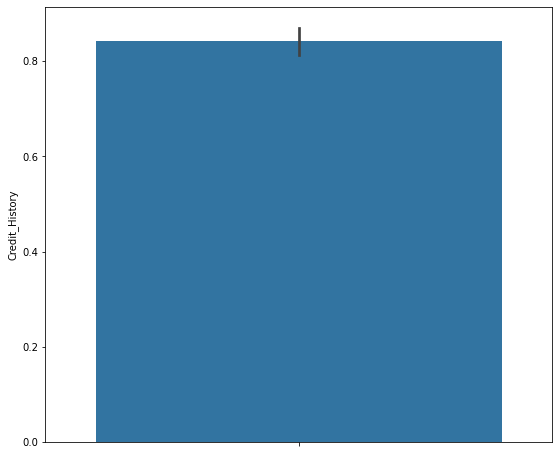

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.barplot(y='Credit_History',data=las,orient='h')

# Data Distribution:

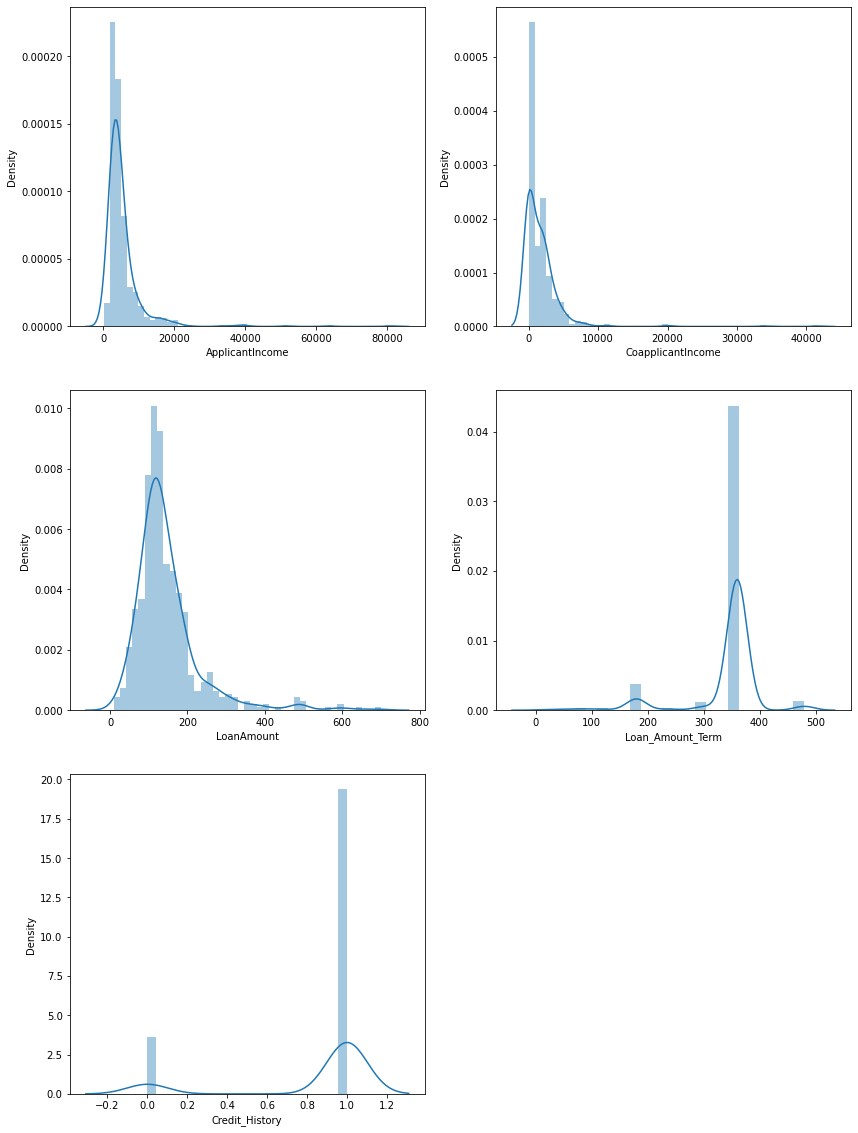

In [16]:
plt.figure(figsize=(14,20))
plot=1
for i in las_1:
    if plot<=14:
        plt.subplot(3,2,plot)
        sns.distplot(las[i])
        plt.xlabel(i)
        plot=plot+1
plt.show();      

# Outlier Detection.

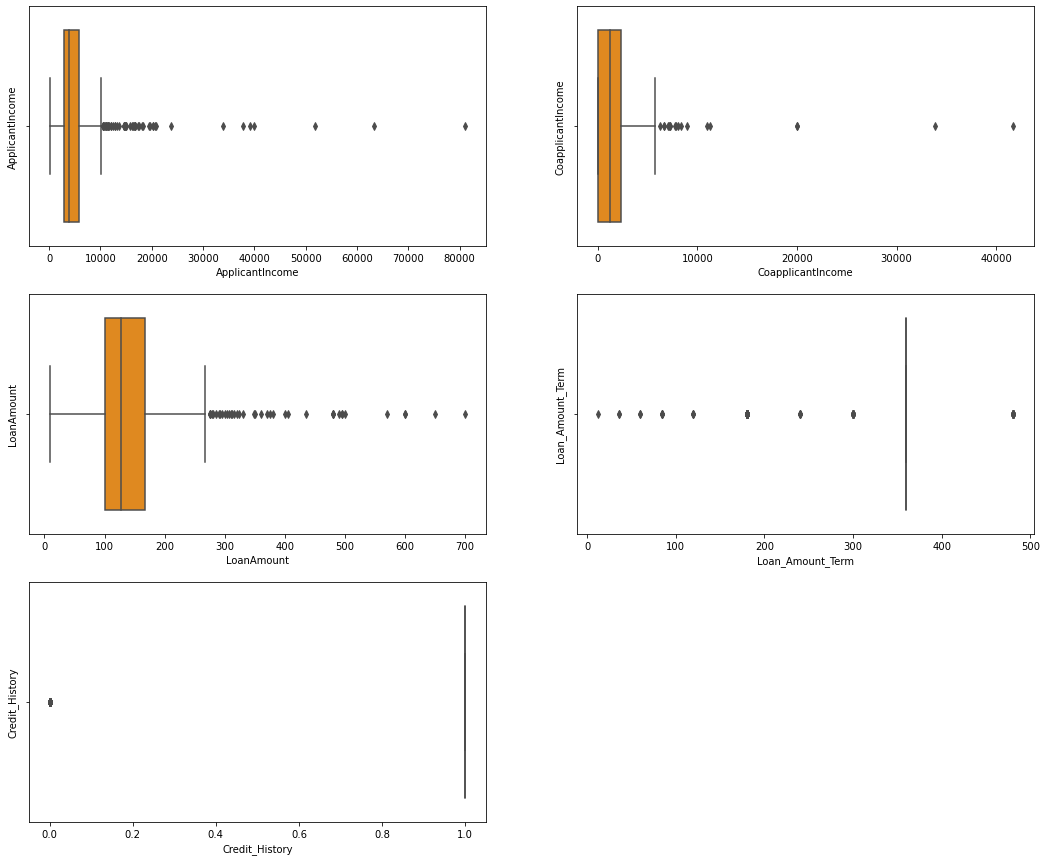

In [17]:
plt.figure(figsize=(18,15))
p=1
for i in las_1:
    if p<=17:
        plt.subplot(3,2,p)
        sns.boxplot(las[i],color='Darkorange',orient='v')
        plt.ylabel(i)
        p=p+1
plt.show();  

In [18]:
# from scipy.stats import zscore
# z =np.abs(zscore(las_1))
# print(z.shape)
# las =las.loc[(z<3).all(axis=1)]
# print(las.shape)
def outlier(data,i):
        IQR=data[i].quantile(.75)-data[i].quantile(.25)
        lower_side=data[i].quantile(.25)-(IQR*1.5)
        upper_side=data[i].quantile(.75)+(IQR*1.5)
        non_outlier=np.where((data[i]<lower_side )|(data[i]>upper_side),data[i].median(),data[i])
        data[i]=non_outlier
        sns.boxplot(data[i])        

In [19]:
outliers=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
outliers

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

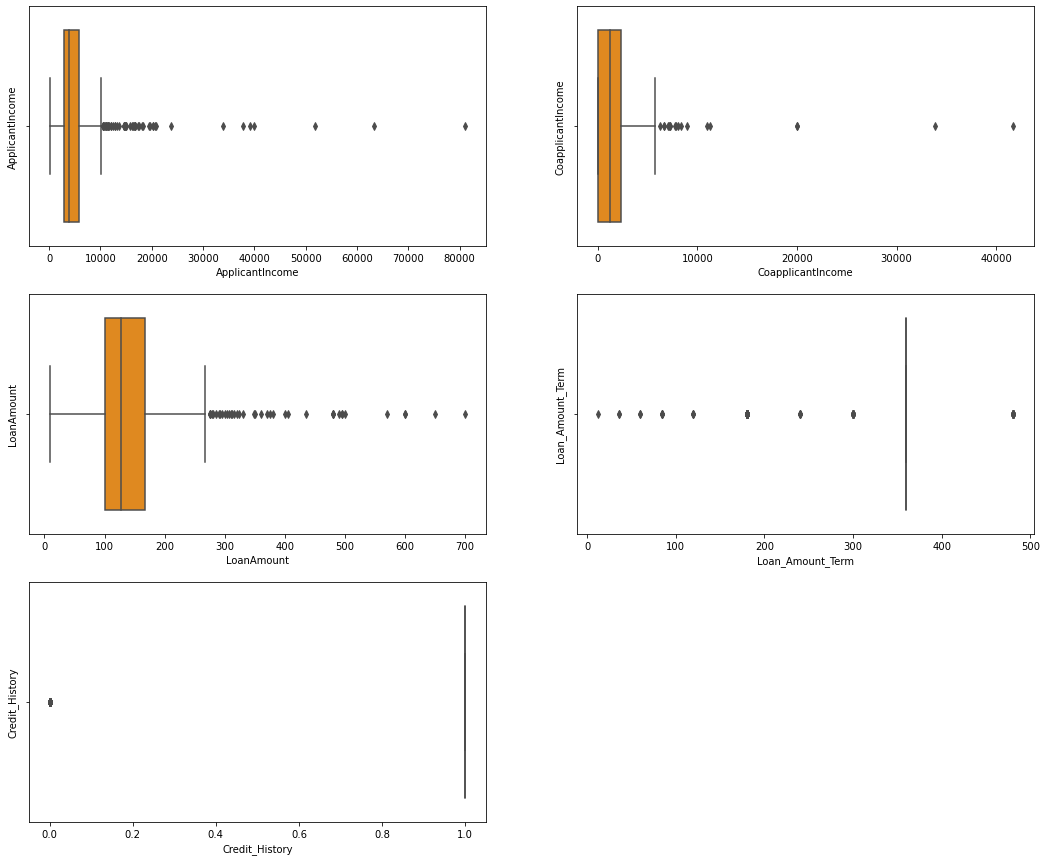

In [20]:
plt.figure(figsize=(18,15))
p=1
for i in outliers:
    if p<=5:
        plt.subplot(3,2,p)
        sns.boxplot(las[i],color='Darkorange',orient='v')
        plt.ylabel(i)
        p=p+1
plt.show();  

# Outliers removed.

# Skewness.

In [21]:
las.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

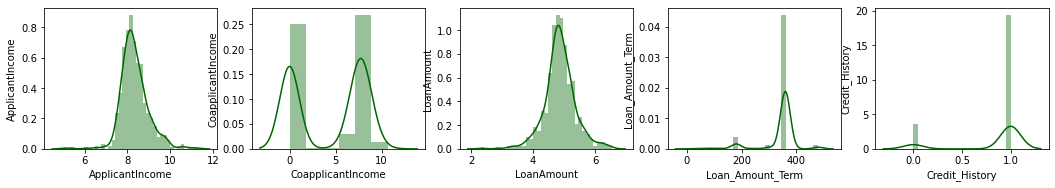

In [22]:
for i in las_1:
    if las[i].skew()>.5:
        las[i]=np.log1p(las[i])
        
plt.figure(figsize=(18,15))
p=1
for i in las_1:
    if p<=17:
        plt.subplot(5,5,p)
        sns.distplot(las[i],color='darkGreen')
        plt.ylabel(i)
        p=p+1
plt.show(); 

Credit history has no valuable record so will drop it.

In [23]:
las.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.150257
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

Skewness removed and now the data is normally distributed.

Encoder.

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in las:
    las[i]=le.fit_transform(las[i])

In [25]:
las.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,376,0,203,8,1,2,1
1,1,1,1,1,0,0,306,60,81,8,1,0,0
2,2,1,1,0,0,1,139,0,26,8,1,2,1
3,3,1,1,0,1,0,90,160,73,8,1,2,1
4,4,1,0,0,0,0,381,0,94,8,1,2,1


# Dropping Target Variable.

In [27]:
x=las.drop(['Loan_Status'],axis=1)
y=las[['Loan_Status']]

# Scaler.

In [28]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled_value=ss.fit_transform(x)
x=pd.DataFrame(scaled_value,columns=x.columns)
x.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.729232,0.382616,-1.357847,-0.752060,-0.528362,-0.445039,0.898633,-0.852357,2.235518,0.246906,0.134703,1.223298
1,-1.723590,0.382616,0.705812,0.141102,-0.528362,-0.445039,0.410559,-0.204048,-0.201088,0.246906,0.134703,-1.318513
2,-1.717948,0.382616,0.705812,-0.752060,-0.528362,1.426564,-0.753846,-0.852357,-1.299558,0.246906,0.134703,1.223298
3,-1.712307,0.382616,0.705812,-0.752060,1.892641,-0.445039,-1.095498,0.876466,-0.360865,0.246906,0.134703,1.223298
4,-1.706665,0.382616,-1.357847,-0.752060,-0.528362,-0.445039,0.933495,-0.852357,0.058550,0.246906,0.134703,1.223298


# Feature Classification.

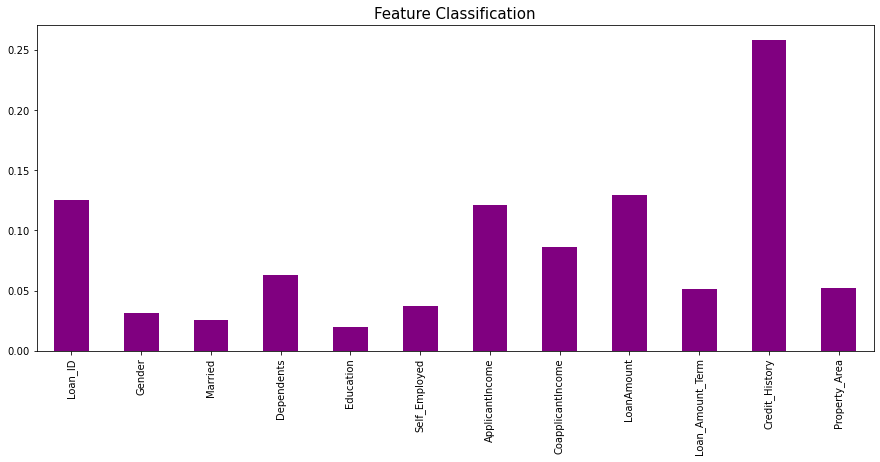

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)
plt.figure(figsize=(15,6))
plt.title('Feature Classification',fontsize=15,)
feature=pd.Series(extra.feature_importances_,index=x.columns)
feature.plot(kind='bar',color='Purple')
plt.show();

# Important Libaries for algorithm implementation.

In [30]:
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

Splitting x and y in 75% for training and 25% testing.

In [36]:
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=.25,random_state=0)

# Model Implementation.

In [42]:
def accuracy(clf,x,y):   
    max_accuracy=0
    for i in range(42,100):
        clf.fit(x_train,y_train)
        pred = clf.predict(x_test)
        accuracy_s = accuracy_score(y_test,pred)
        if accuracy_s > max_accuracy:
            max_accuracy = accuracy_s
            result = i
    
    print('max_accuracy_score',result,'is',max_accuracy*100)
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('Confusion_Matrix',confusion_matrix(y_test,pred))
    print('Classification_Report',classification_report(y_test,pred))
    
    print('Roc_auc_Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    
    
    return result

max_accuracy_score 42 is 82.46753246753246
cross validation score 80.45715047314405
Standard Deviation 2.760671649517159
Training accuracy 80.0
Test Accuracy 82.46753246753246
Confusion_Matrix [[ 19  24]
 [  3 108]]
Classification_Report               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.82      0.97      0.89       111

    accuracy                           0.82       154
   macro avg       0.84      0.71      0.74       154
weighted avg       0.83      0.82      0.80       154

Roc_auc_Score 0.7074167190446261





42

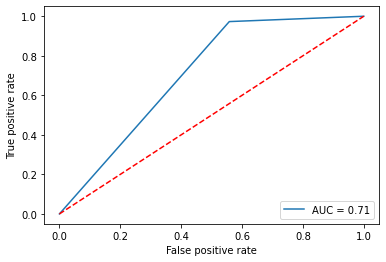

In [43]:
lg=LogisticRegression()
accuracy(lg,x,y)

max_accuracy_score 97 is 72.72727272727273
cross validation score 67.41703318672532
Standard Deviation 8.239732676575358
Training accuracy 100.0
Test Accuracy 68.18181818181817
Confusion_Matrix [[22 21]
 [28 83]]
Classification_Report               precision    recall  f1-score   support

           0       0.44      0.51      0.47        43
           1       0.80      0.75      0.77       111

    accuracy                           0.68       154
   macro avg       0.62      0.63      0.62       154
weighted avg       0.70      0.68      0.69       154

Roc_auc_Score 0.6296878273622459





97

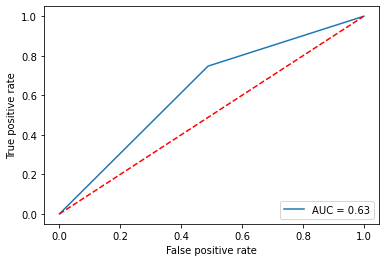

In [44]:
dt=DecisionTreeClassifier()
accuracy(dt,x,y)

max_accuracy_score 42 is 78.57142857142857
cross validation score 73.78115420498467
Standard Deviation 2.234409248322878
Training accuracy 81.08695652173913
Test Accuracy 78.57142857142857
Confusion_Matrix [[ 17  26]
 [  7 104]]
Classification_Report               precision    recall  f1-score   support

           0       0.71      0.40      0.51        43
           1       0.80      0.94      0.86       111

    accuracy                           0.79       154
   macro avg       0.75      0.67      0.69       154
weighted avg       0.77      0.79      0.76       154

Roc_auc_Score 0.6661428870731196





42

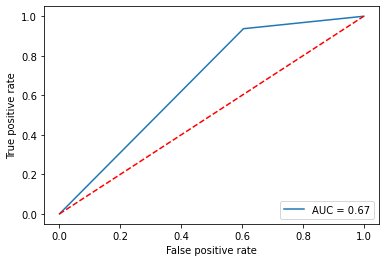

In [45]:
knn=KNeighborsClassifier()
accuracy(knn,x,y)

max_accuracy_score 42 is 83.11688311688312
cross validation score 80.78368652538984
Standard Deviation 2.923416378093254
Training accuracy 83.04347826086956
Test Accuracy 83.11688311688312
Confusion_Matrix [[ 19  24]
 [  2 109]]
Classification_Report               precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154

Roc_auc_Score 0.7119212235491306





42

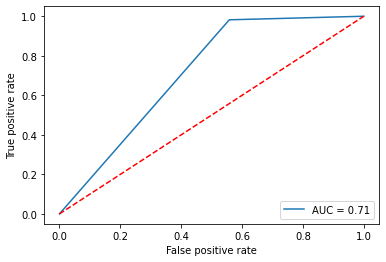

In [46]:
sv=SVC()
accuracy(sv,x,y)

max_accuracy_score 49 is 85.06493506493507
cross validation score 77.35972277755565
Standard Deviation 3.9399576158350844
Training accuracy 100.0
Test Accuracy 84.4155844155844
Confusion_Matrix [[ 22  21]
 [  3 108]]
Classification_Report               precision    recall  f1-score   support

           0       0.88      0.51      0.65        43
           1       0.84      0.97      0.90       111

    accuracy                           0.84       154
   macro avg       0.86      0.74      0.77       154
weighted avg       0.85      0.84      0.83       154

Roc_auc_Score 0.7423004399748586





49

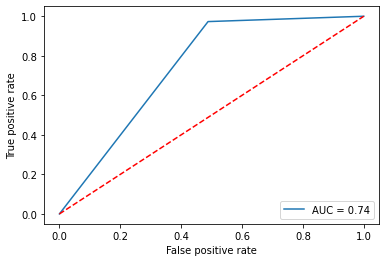

In [47]:
rf=RandomForestClassifier()
accuracy(rf,x,y)

max_accuracy_score 42 is 80.51948051948052
cross validation score 67.92349726775957
Standard Deviation 17.230388166434086
Training accuracy 83.26086956521739
Test Accuracy 80.51948051948052
Confusion_Matrix [[ 23  20]
 [ 10 101]]
Classification_Report               precision    recall  f1-score   support

           0       0.70      0.53      0.61        43
           1       0.83      0.91      0.87       111

    accuracy                           0.81       154
   macro avg       0.77      0.72      0.74       154
weighted avg       0.80      0.81      0.80       154

Roc_auc_Score 0.7223968154200713





42

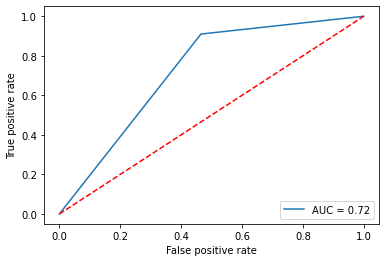

In [48]:
Adb=AdaBoostClassifier()
accuracy(Adb,x,y)

max_accuracy_score 42 is 81.16883116883116
cross validation score 71.82593629214982
Standard Deviation 7.849061765137859
Training accuracy 90.43478260869566
Test Accuracy 81.16883116883116
Confusion_Matrix [[ 21  22]
 [  7 104]]
Classification_Report               precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.83      0.94      0.88       111

    accuracy                           0.81       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.80      0.81      0.80       154

Roc_auc_Score 0.7126545149800964





42

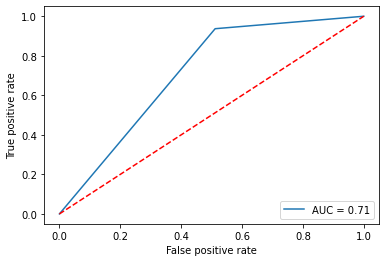

In [49]:
gnb=GradientBoostingClassifier()
accuracy(gnb,x,y)

In [50]:
rf = RandomForestClassifier()
params={'n_estimators':[10,12,15,19],
       'criterion':['entropy','gini'],
       'max_depth':[10,12,16,18],
       'min_samples_split':[10,12,11,13],
       'min_samples_leaf':[4,5,6,8]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rf=grd.best_estimator_ 
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

rf_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rf_conf_mat)
print('Accuracy of random forest After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 15}
con_mat=>  
 [[ 20  23]
 [  3 108]]
Accuracy of random forest After Hyperparameter Tuning==>  83.11688311688312


In [51]:
import joblib
joblib.dump(rf,'loan.pkl')

['loan.pkl']

In [52]:
loaded_model=joblib.load('loan.pkl')
prediction=loaded_model.predict(x_test)

In [53]:
prediction

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])